In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Dada la existencia de columnas con un gran numero de valores nulos, se realiza un primer paso de limpieza donde se eliminan las columnas cuya ocurrencia de valores nulos sea mayor al 30%.

Cabe aclarar que dada la naturaleza de la columna de ID, esta tambien es descartada dentro de este primer filtro

In [4]:
df2 = df[[column for column in df if df[column].count() / len(df) > 0.3]]
del df2['Id']
print("Columnas descartadas son:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
df = df2

Columnas descartadas son: Id, Alley, PoolQC, Fence, MiscFeature, 

##### Dado que la columna SalePrice juega un papel muy importante en el dataset, se hace un analisis especifico para esta columna

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\hugoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


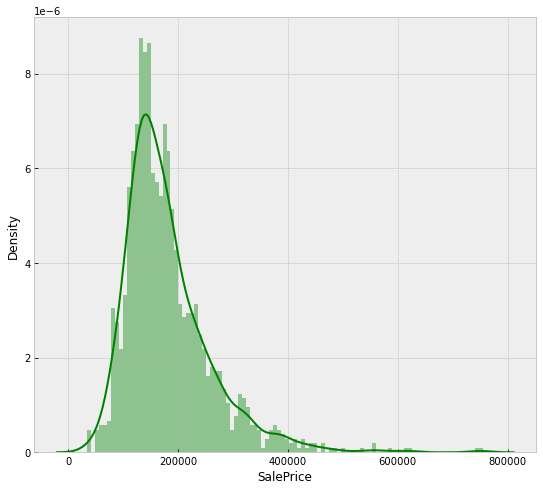

In [5]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### Se realiza un analisis a las variables numericas presentes en el dataset

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#### Ahora se buscan las correlaciones que existen entre las variables numericas y la variable objetivo (SalePrice)

In [7]:
df_num_corr = df_num.corr()['SalePrice'][:-1]
df_num_corr

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

#### Se les hace mencion a las viariables que tienen una correlacion alta

In [8]:
golden_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print("Hay {} variables con correlacion positiva con SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


Hay 10 variables con correlacion positiva con SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


#### Realizando una limpieza eliminando los valores en cero del dataset con las variables numericas

In [9]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1):
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

In [10]:
# Obteniendo nuevamente la lista de las variables que con una alta correlacion se obtiene que ahora hay una 
# nueva variable que cumple con la condicion
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("Hay {} variables con correlacion positiva con SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

Hay 11 variables con correlacion positiva con SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


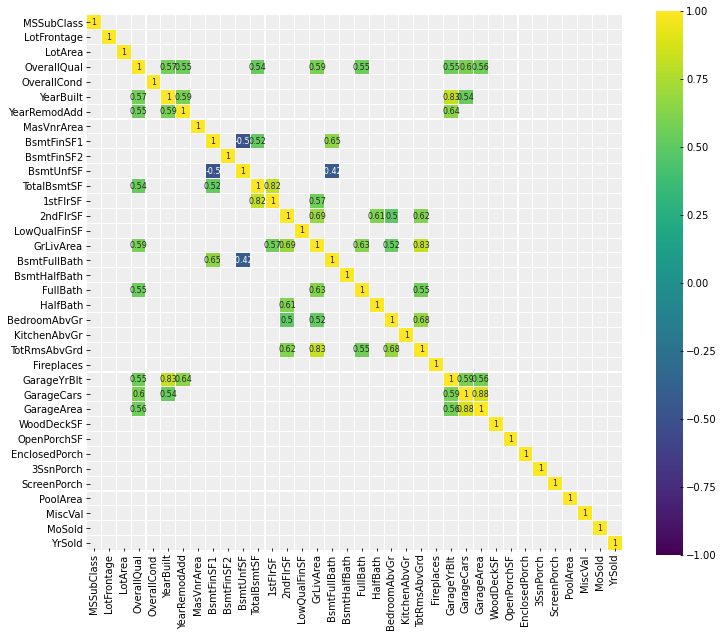

In [11]:
# Realizamos un mapa de calor con los coeficientes de correlacion para mayor claridad y facilidad de lectura
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);



### Ahora se hace un analisis PCA de las variables

In [12]:
from sklearn.decomposition import PCA
import numpy as np

In [13]:
n = len(df_num.columns)
n

37

### Se eliminan los valores NaN y InF de las variables numericas

In [10]:
df_num = df_num[~df_num.isin([np.nan, np.inf, -np.inf]).any(1)]
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
pca = PCA(n_components=n)
pca.fit(df_num)

PCA(n_components=37)

In [12]:
print('Componentes:')
print(pd.DataFrame(pca.components_))
principalComponents = pca.fit_transform(df_num)
INDIVID = pd.DataFrame(principalComponents)
print('Varianza')
print('============================')
print(pd.DataFrame(pca.explained_variance_ratio_))

Componentes:
          0             1             2             3             4   \
0  -0.000045  1.008819e-04  2.962510e-02  1.326444e-05 -1.600183e-06   
1  -0.000969  1.040830e-03  9.994436e-01 -1.379903e-05  4.663773e-07   
2  -0.018148  2.880202e-03 -8.045037e-03 -1.029527e-04 -8.055783e-05   
3  -0.018893  4.035445e-03  7.823209e-04  3.337635e-04 -2.622299e-04   
4   0.011344  1.258044e-02 -1.205186e-02  2.687805e-04 -2.214221e-04   
5  -0.012721  1.028561e-02 -3.699929e-03 -4.870251e-04  3.525872e-04   
6  -0.011689 -6.529358e-03 -2.774731e-03 -1.916560e-05  6.077152e-04   
7  -0.017771  2.256041e-03  1.954247e-04 -3.149938e-04  8.070419e-04   
8   0.007370  2.750087e-03  7.488772e-04  4.290692e-05 -3.386682e-04   
9  -0.005136  1.717883e-02 -4.266754e-04  3.970678e-04 -8.617460e-04   
10  0.004638 -1.544396e-02 -5.557357e-05  2.768935e-04  2.954842e-04   
11 -0.069246  2.684081e-02 -3.589337e-04 -1.010989e-03  5.235571e-04   
12 -0.058058  1.568544e-02  3.790826e-05 -1.682136e

### Graficas de PDA

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,-0.309809,0.553170,0.056834,-0.304345,-0.026217,0.228700,0.148811,-0.049902,6.359594e-11,-4.117392e-11
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.076511,-0.382282,-0.795401,0.742017,0.440964,0.002985,0.656872,-0.009240,-1.391007e-11,1.880537e-11
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.119161,-0.521319,0.229789,-0.519053,-0.209812,0.270910,0.166019,0.091230,5.679727e-11,-2.897564e-11
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.238652,-0.417485,0.245037,-0.859489,0.670453,-0.659923,0.070735,-0.083039,4.399728e-11,7.696574e-12
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.024705,-0.234371,0.349418,-0.416772,0.055021,-0.082554,0.019388,-0.081611,4.809032e-11,-2.238610e-11


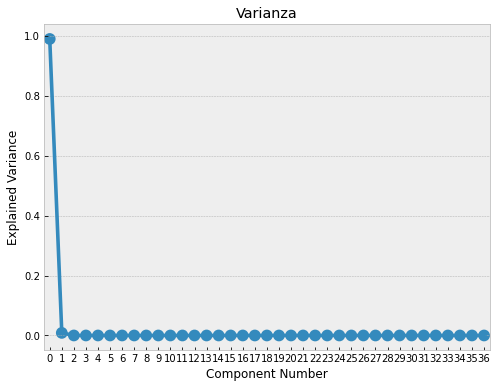

C:\Users\hugoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hugoh\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


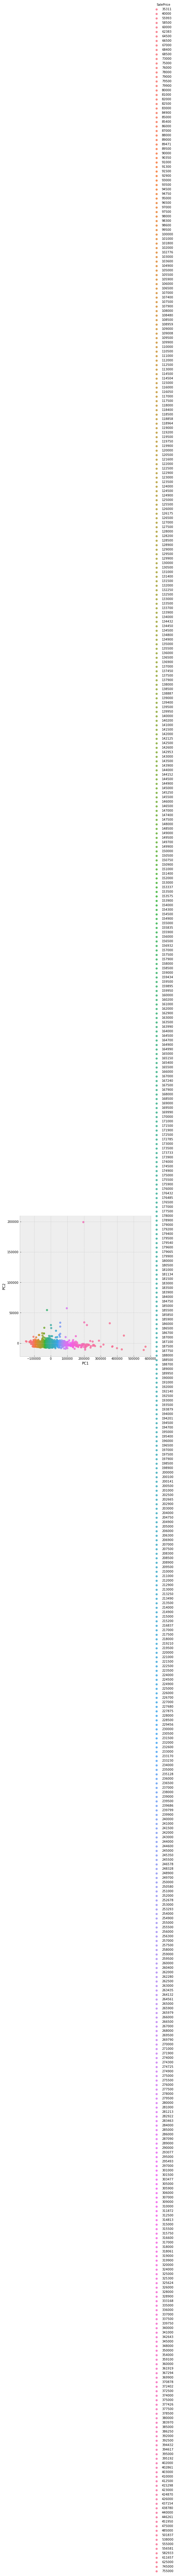

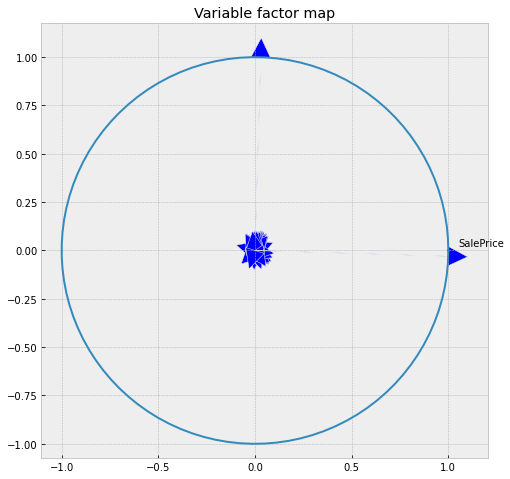

In [13]:
#Realizar PCA graficamente

df = df_num.copy()

n_components = len(df.columns)

# Do the PCA.

pca = PCA(n_components=n_components)

reduced = pca.fit_transform(df)

# Append the principle components for each entry to the dataframe

for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot

ind = np.arange(0, n_components)

(fig, ax) = plt.subplots(figsize=(8, 6))

sns.pointplot(x=ind, y=pca.explained_variance_ratio_)

ax.set_title('Varianza')

ax.set_xticks(ind)

ax.set_xticklabels(ind)

ax.set_xlabel('Component Number')

ax.set_ylabel('Explained Variance')

plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1','PC2',hue='SalePrice',data=df,fit_reg=False,scatter=True,size=7)
plt.show()

# Plot a variable factor map for the first two dimensions.

(fig, ax) = plt.subplots(figsize=(8, 8))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
    0, # Start the arrow at the origin
    pca.components_[0, i], #0 for PC1
    pca.components_[1, i], #1 for PC2
    head_width=0.1,
    head_length=0.1)


plt.text(pca.components_[0, i] + 0.05,

       pca.components_[1, i] + 0.05,

       df.columns.values[i])



an = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scale

plt.axis('equal')

ax.set_title('Variable factor map')

plt.show()

### Se agrega como EDA final el reporte realizado por Pandas Profiling

Tener encuenta que el reporte es pesado al momento de abrir. Y su aun mas pesado de generar

In [14]:
from pandas_profiling import ProfileReport

In [27]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("Reporte Calidad EDA.html")